# Fernando Alonso

<img src="https://www.formula1.com/content/fom-website/en/drivers/fernando-alonso/_jcr_content/image.img.1920.medium.jpg/1641808424475.jpg" width="300">

### Team: Alpine

<img src ="https://www.formula1.com/content/fom-website/en/drivers/fernando-alonso/_jcr_content/helmet.img.png/1617101187829.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

alo_laps <- lap_data %>%
            filter(driverId == 4)

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

rmse_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
4,57
20,57
38,57
53,57
73,57
92,57
863,57
883,57
902,57


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5727906,95.4651,1.591085


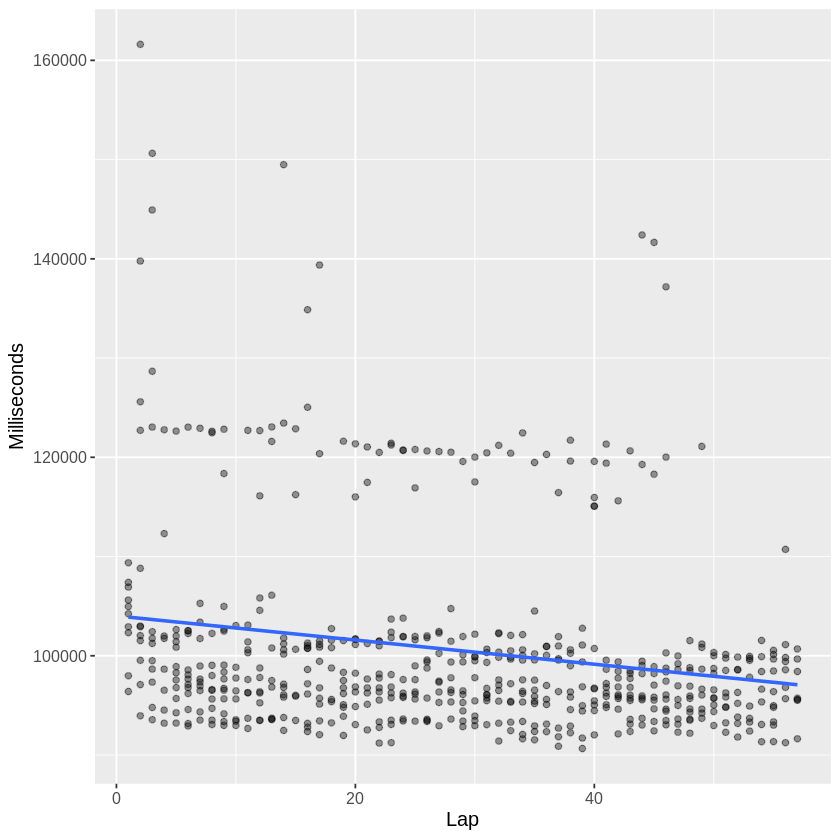

In [5]:
#1. BAHRAIN 

fa_bahrain <- alo_laps %>%
                filter(raceId %in% bahrain_race_ID) 

fa_bahrain_clean <- fa_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
fa_bahrain_clean
fa_bahrain_clean_ID <- fa_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_bahrain_races <- alo_laps %>%
                    filter(raceId %in% fa_bahrain_clean_ID)

formulaone_split <- initial_split(fa_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1054,66


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5664482,94.40804,1.573467


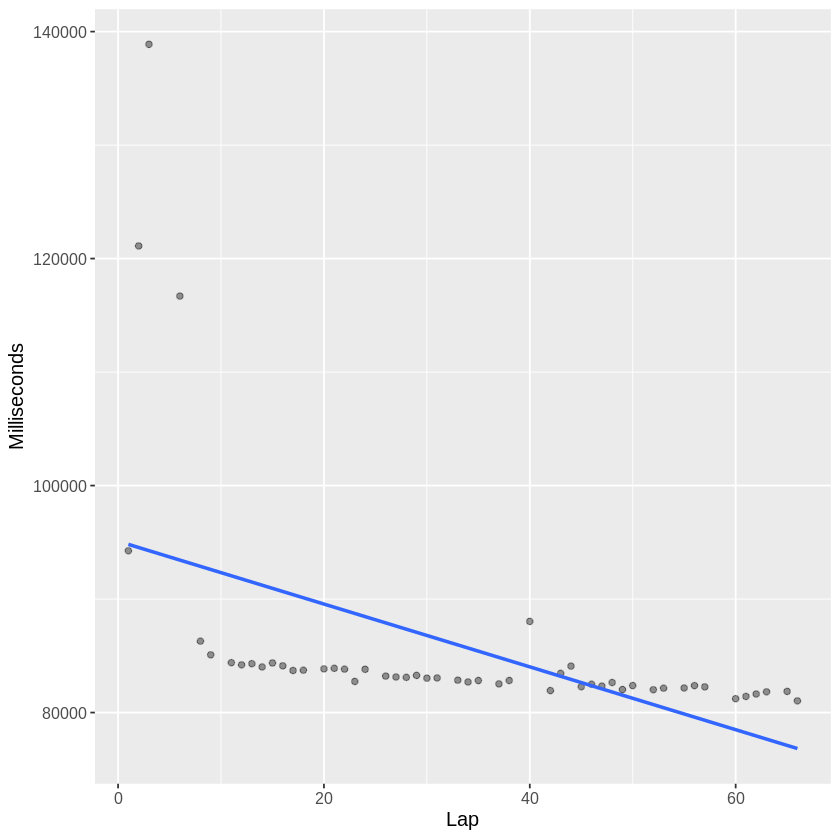

In [6]:
#2. Portimão

fa_Portimão <- alo_laps %>%
                filter(raceId %in% Portimão_race_ID) 

fa_Portimão_faean <- fa_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_Portimão_faean
fa_Portimão_faean_ID <- fa_Portimão_faean %>%
                        pull(raceId)


### SPLITTING DATA

fa_Portimão_races <- alo_laps %>%
                    filter(raceId %in% fa_Portimão_faean_ID)

formulaone_split <- initial_split(fa_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1,58
18,58
36,58
90,58
108,58
338,58
841,58
860,58
880,58


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5512219,91.87031,1.531172


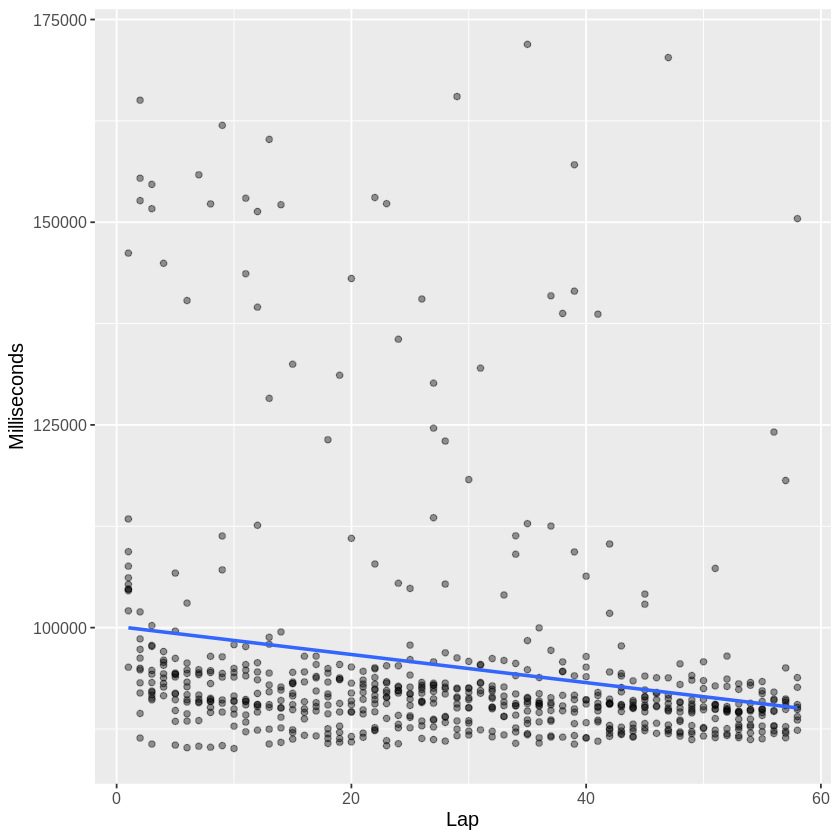

In [7]:
#3. Australia

fa_aus <- alo_laps %>%
                filter(raceId %in% aus_race_ID) 

fa_aus_clean <- fa_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_aus_clean
fa_aus_clean_ID <- fa_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_aus_races <- alo_laps %>%
                    filter(raceId %in% fa_aus_clean_ID)

formulaone_split <- initial_split(fa_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1053,63
56,62
74,62
93,62
111,62
144,5


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5520850,92.01416,1.533569


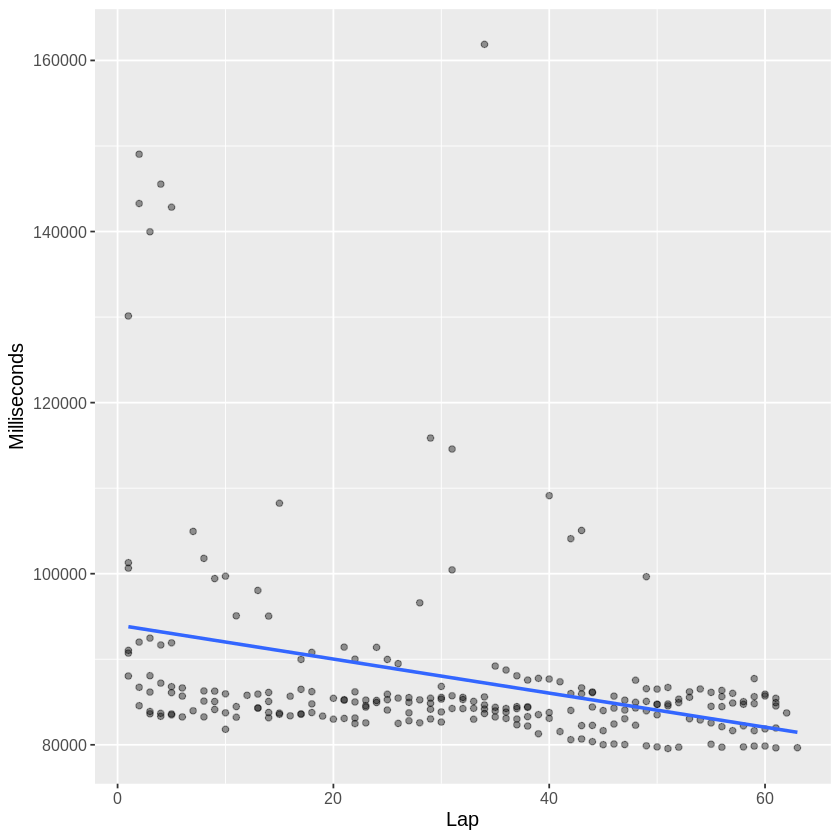

In [8]:
#4. Italy, Imola

fa_imola <- alo_laps %>%
                filter(raceId %in% imola_race_ID) 

fa_imola_clean <- fa_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_imola_clean
fa_imola_clean_ID <- fa_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_imola_races <- alo_laps %>%
                    filter(raceId %in% fa_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(fa_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
7,58
22,58
47,58
66,58
84,58
343,58
844,58
1067,57


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5225679,87.09464,1.451577


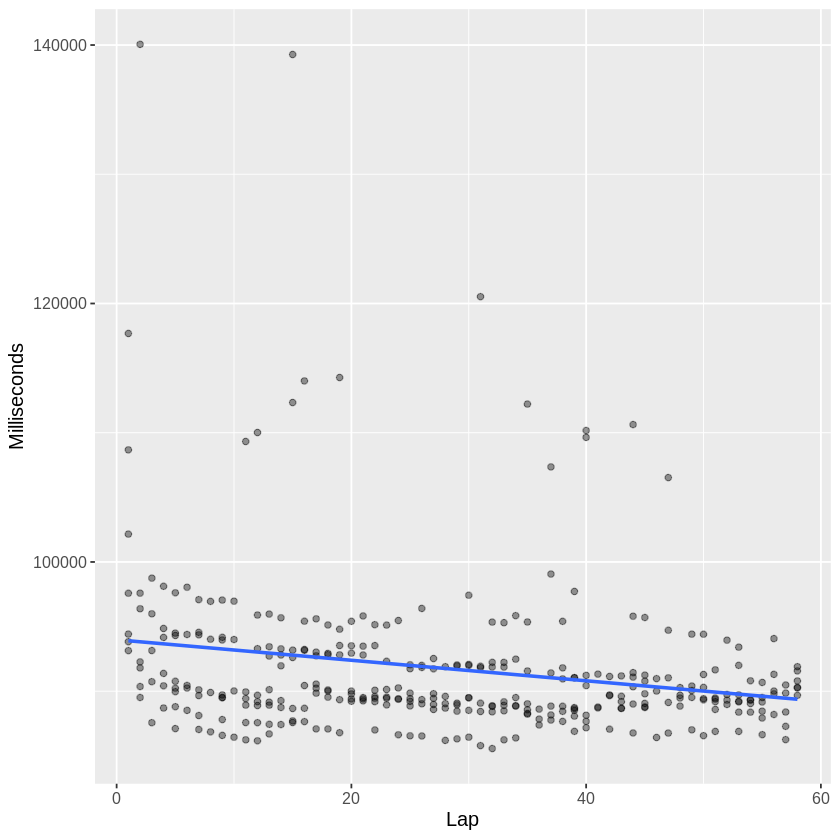

In [9]:
#5. Turkey (Replacing Miami)

fa_turkey <- alo_laps %>%
                filter(raceId %in% turkey_race_ID) 

fa_turkey_clean <- fa_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_turkey_clean
fa_turkey_clean_ID <- fa_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_turkey_races <- alo_laps %>%
                    filter(raceId %in% fa_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(fa_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
5,66
58,66
75,66
94,66
341,66
864,66
884,66
904,66
39,65


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5771084,96.18473,1.603079


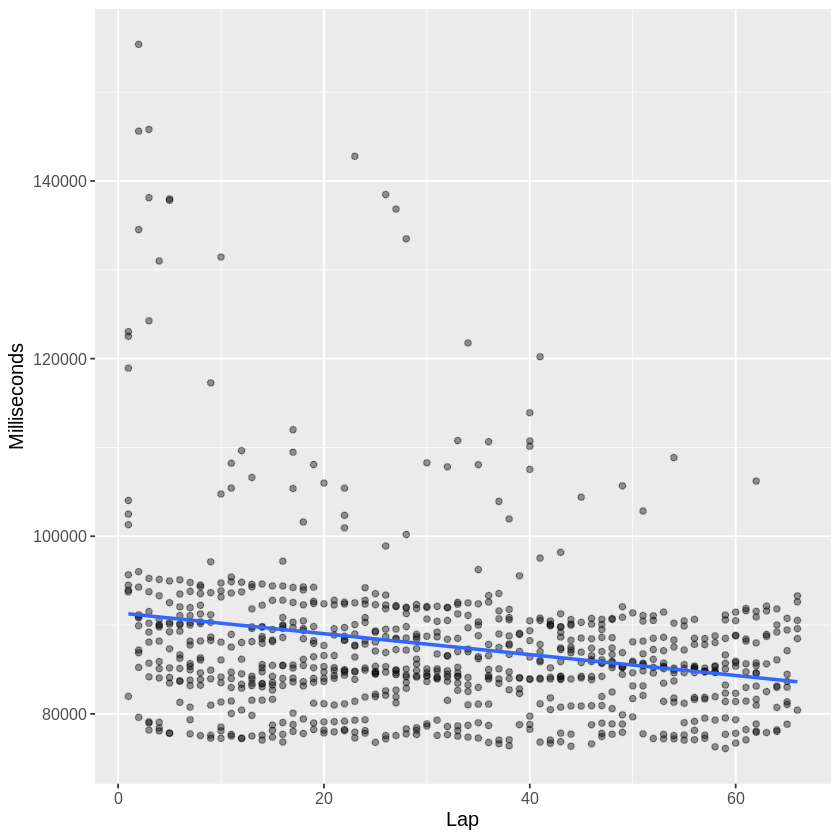

In [10]:
#6.  Spain

fa_spain <- alo_laps %>%
                filter(raceId %in% spain_race_ID) 

fa_spain_clean <- fa_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_spain_clean
fa_spain_clean_ID <- fa_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_spain_races <- alo_laps %>%
                    filter(raceId %in% fa_spain_clean_ID)

formulaone_split <- initial_split(fa_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
6,78
40,78
59,78
76,78
114,78
342,78
846,78
865,78
885,78


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6593183,109.8864,1.83144


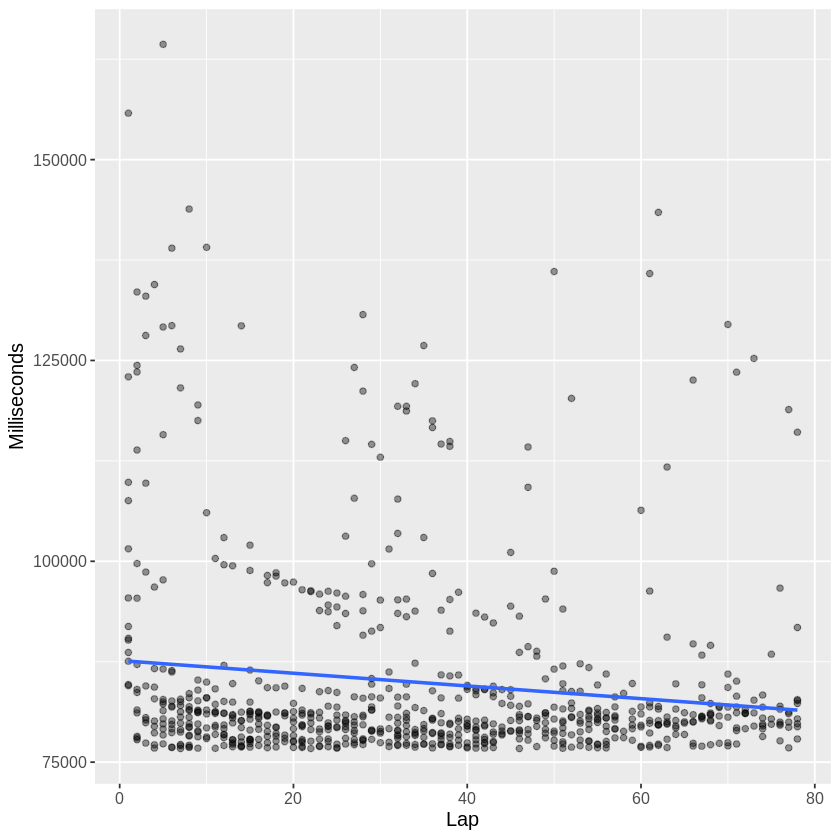

In [11]:
#7. Monaco

fa_monaco <- alo_laps %>%
                filter(raceId %in% monaco_race_ID) 

fa_monaco_clean <- fa_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_monaco_clean
fa_monaco_clean_ID <- fa_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_monaco_races <- alo_laps %>%
                    filter(raceId %in% fa_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(fa_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
976,51
992,51
1057,51
955,42


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6067466,101.1244,1.685407


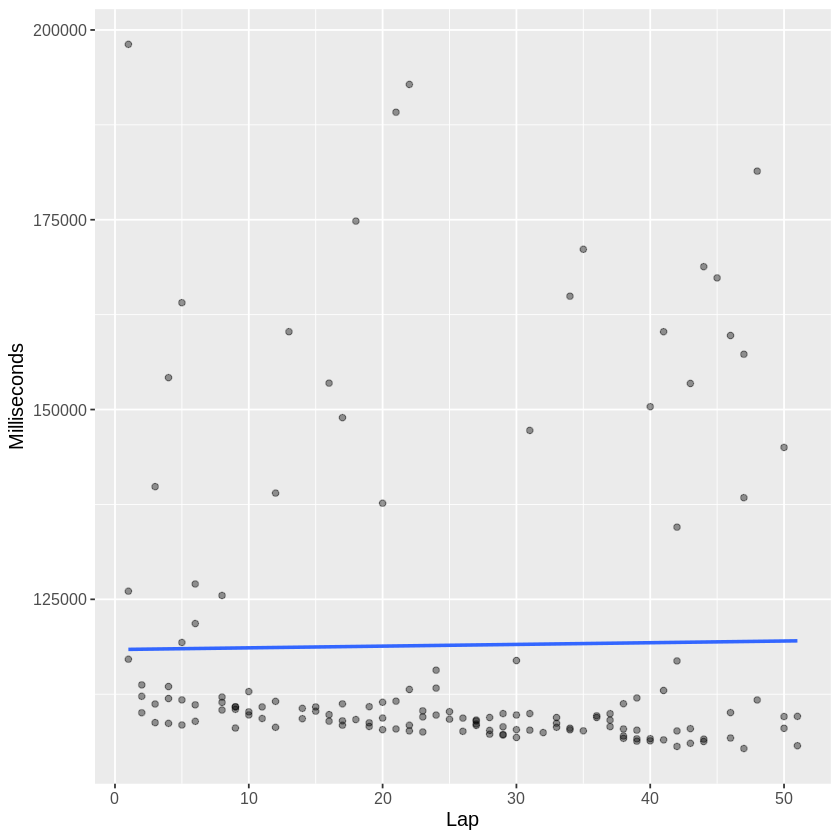

In [12]:
#8.  Azerbaijan

fa_azerbaijan <- alo_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

fa_azerbaijan_clean <- fa_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_azerbaijan_clean
fa_azerbaijan_clean_ID <- fa_azerbaijan_clean %>%
                        pull(raceId) 


### SPLITTING DATA

fa_azerbaijan_races <- alo_laps %>%
                    filter(raceId %in% fa_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(fa_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
41,70
61,70
115,70
344,70
866,70
886,70
906,70
954,69
975,66


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5746659,95.77765,1.596294


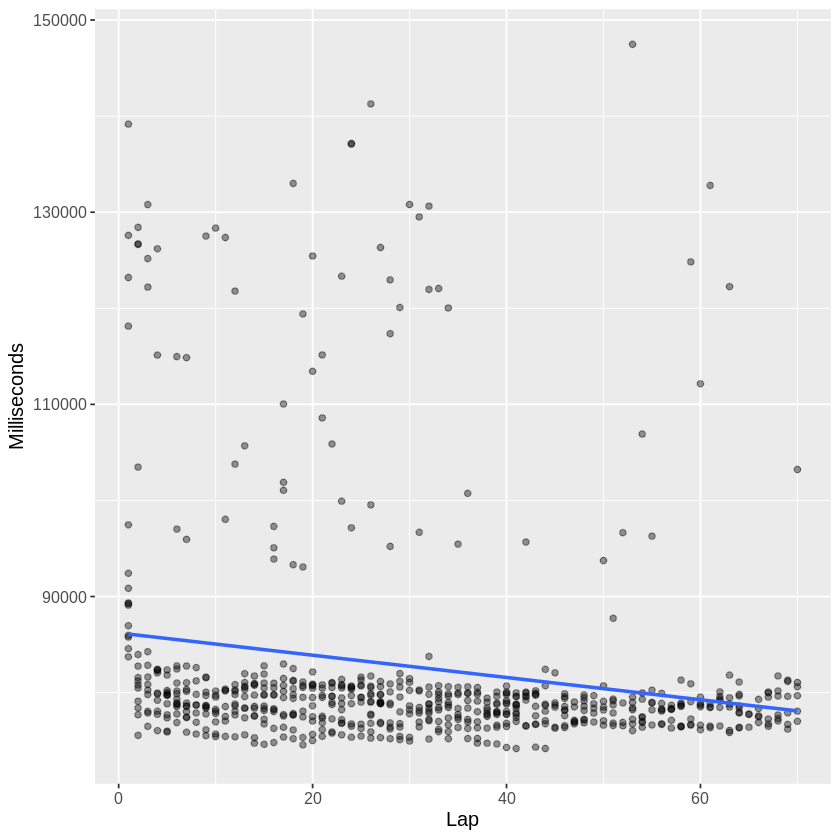

In [13]:
#9. Canada

fa_canada <- alo_laps %>%
                filter(raceId %in% canada_race_ID) 

fa_canada_clean <- fa_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_canada_clean
fa_canada_clean_ID <- fa_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_canada_races <- alo_laps %>%
                    filter(raceId %in% fa_canada_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(fa_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4995499,83.25832,1.387639


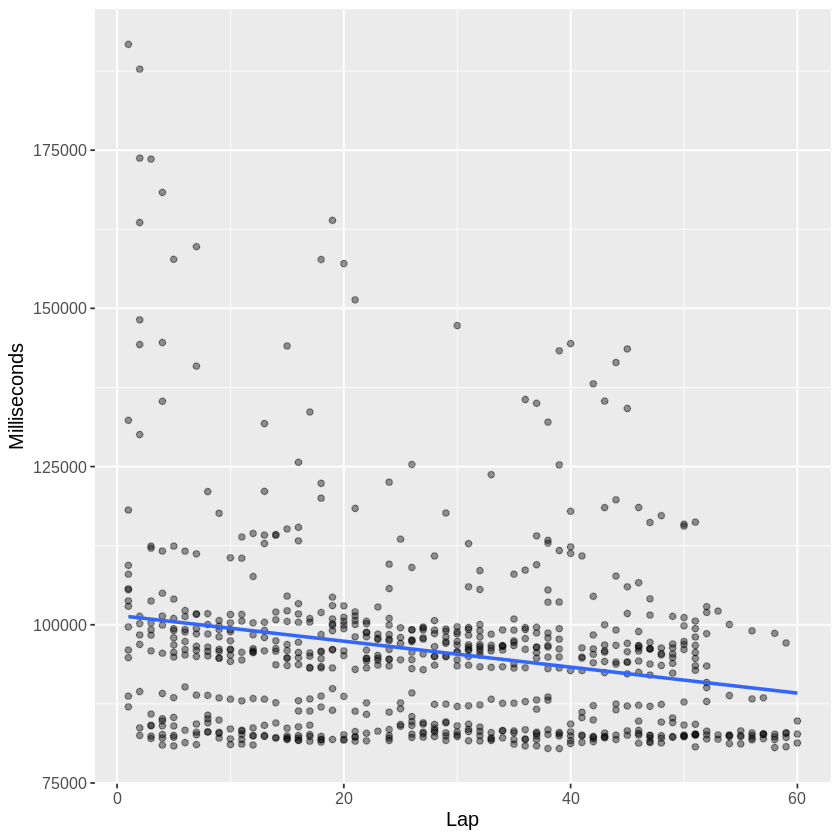

In [14]:
#10. Great Britain

fa_uk <- alo_laps %>%
                filter(raceId %in% uk_race_ID) 

fa_uk_clean <- fa_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

fa_uk_clean_ID <- fa_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_uk_races <- alo_laps %>%
                    filter(raceId %in% fa_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(fa_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5154928,85.91547,1.431925


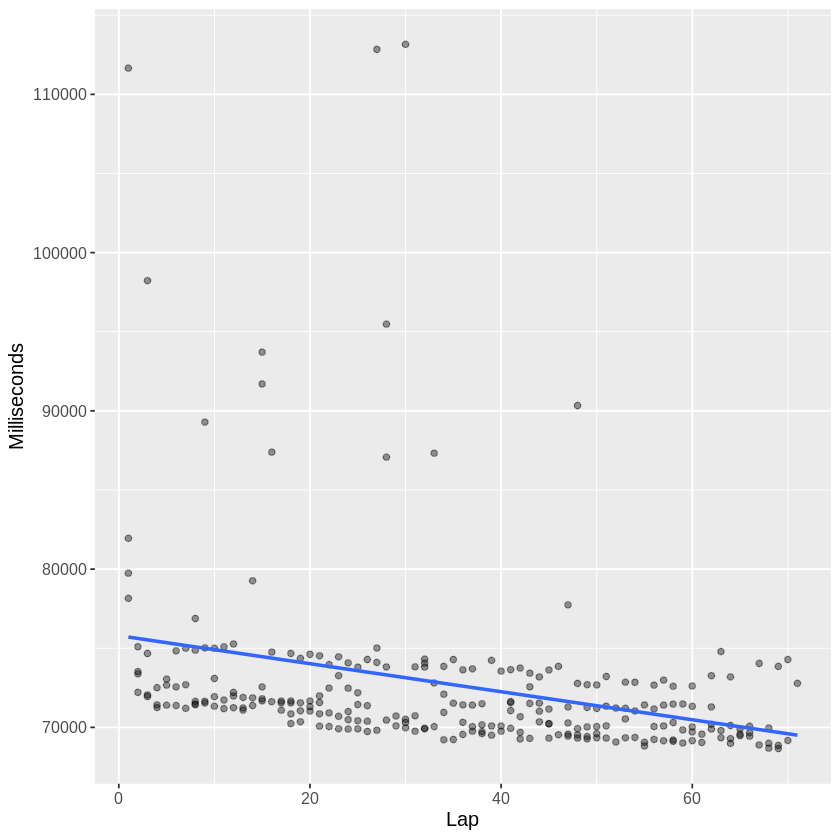

In [15]:
#11. Austria

fa_austria <- alo_laps %>%
                filter(raceId %in% austria_race_ID) 

fa_austria_clean <- fa_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

fa_austria_clean_ID <- fa_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_austria_races <- alo_laps %>%
                    filter(raceId %in% fa_austria_clean_ID)

formulaone_split <- initial_split(fa_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,53
996,50


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5375383,89.58971,1.493162


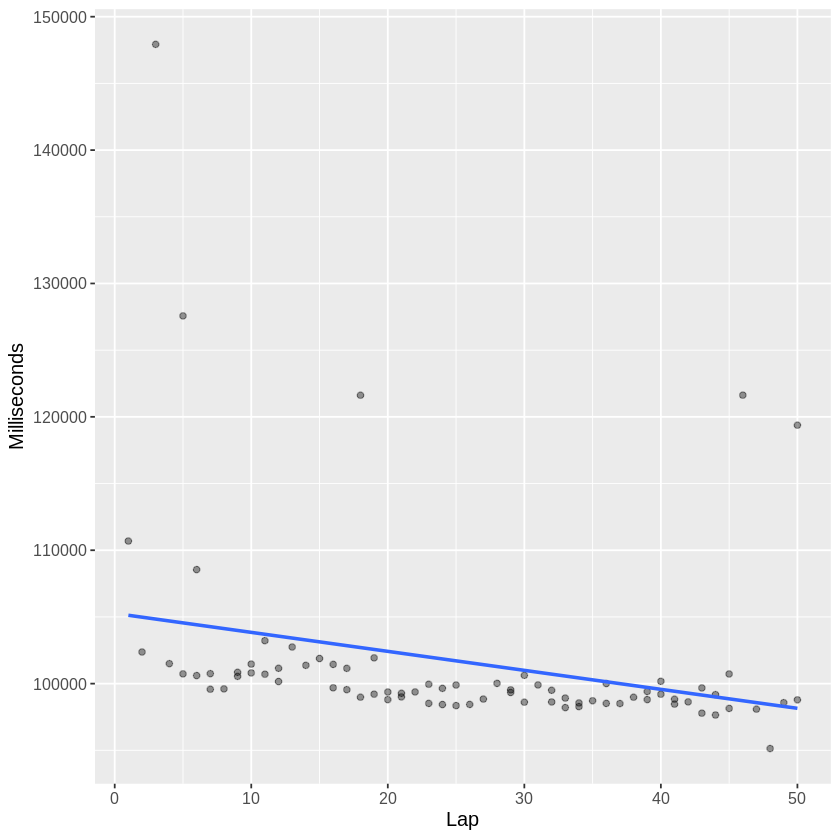

In [16]:
#12.  France

fa_france <- alo_laps %>%
                filter(raceId %in% france_race_ID) 

fa_france_clean <- fa_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_france_clean
fa_france_clean_ID <- fa_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_france_races <- alo_laps %>%
                    filter(raceId %in% fa_france_clean_ID)

formulaone_split <- initial_split(fa_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6200856,103.3476,1.72246


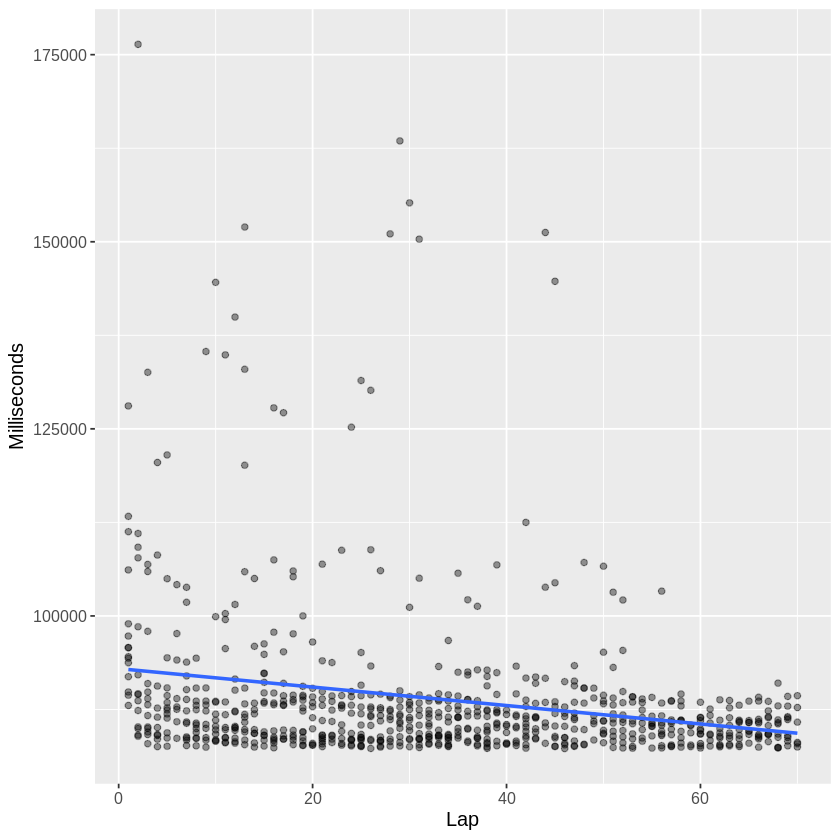

In [17]:
#13.  Hungary

fa_hungary <- alo_laps %>%
                filter(raceId %in% hungary_race_ID) 

fa_hungary_clean <- fa_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

fa_hungary_clean_ID <- fa_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_hungary_races <- alo_laps %>%
                    filter(raceId %in% fa_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(fa_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
30,44
49,44
86,44
852,44
891,44
911,44
960,44
937,42
349,37


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5152049,85.86748,1.431125


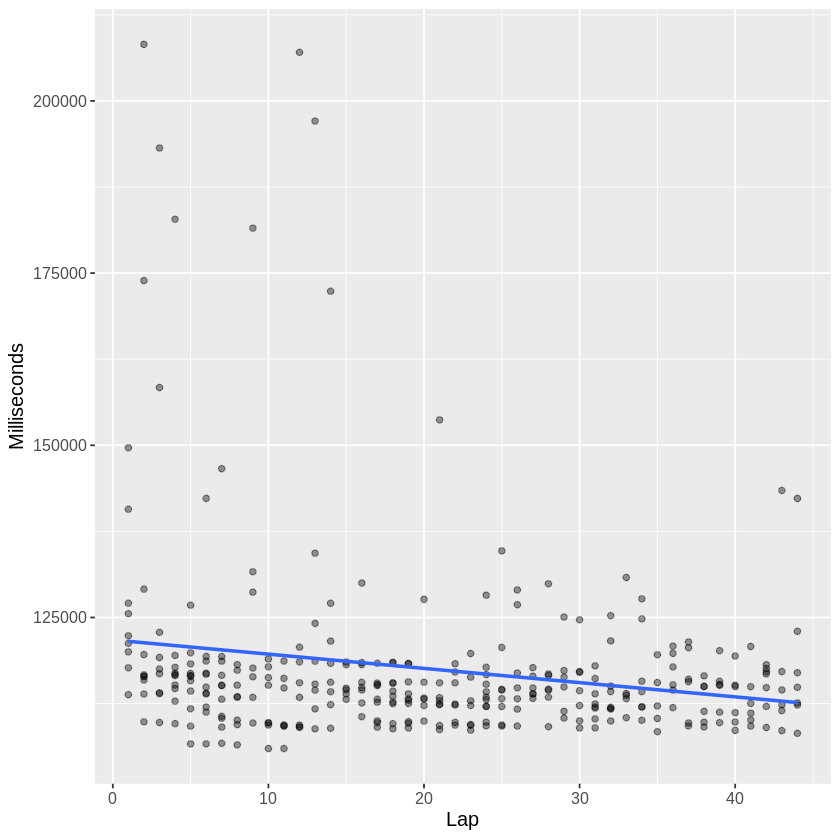

In [18]:
#14. Belgium

fa_belgium <- alo_laps %>%
                filter(raceId %in% belgium_race_ID) 

fa_belgium_clean <- fa_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_belgium_clean
fa_belgium_clean_ID <- fa_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_belgium_races <- alo_laps %>%
                    filter(raceId %in% fa_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(fa_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5503738,91.72897,1.528816


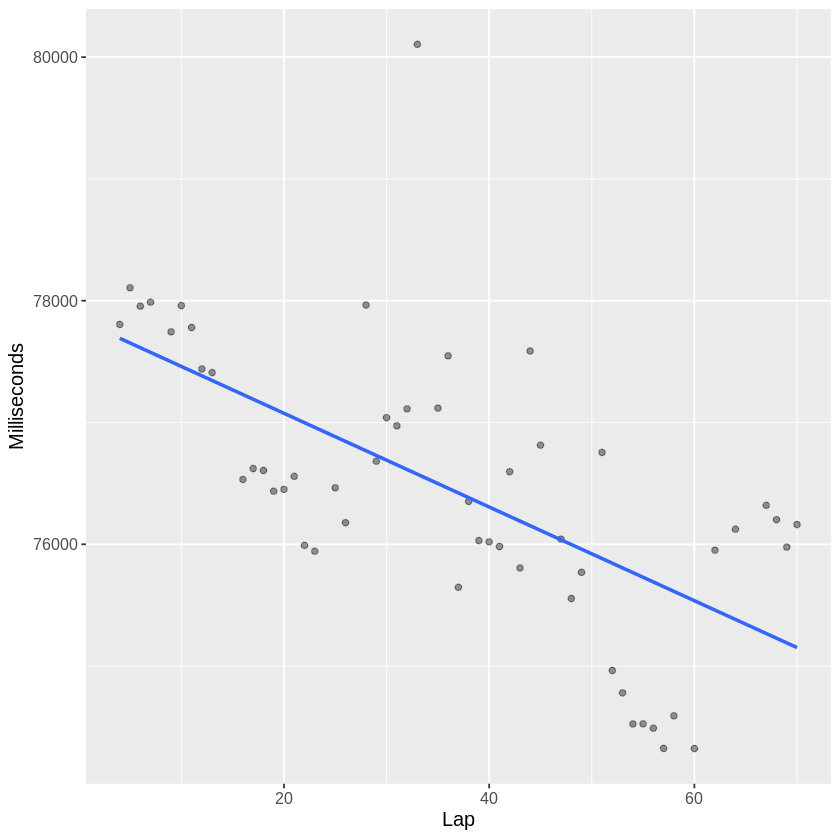

In [19]:
#15.  Netherlands

fa_netherlands <- alo_laps %>%
                filter(raceId %in% netherlands_race_ID) 

fa_netherlands_clean <- fa_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_netherlands_clean
fa_netherlands_clean_ID <- fa_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_netherlands_races <- alo_laps %>%
                    filter(raceId %in% fa_netherlands_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(fa_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
13,53
31,53
48,53
85,53
350,53
853,53
872,53
892,53
1065,53


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4745656,79.09426,1.318238


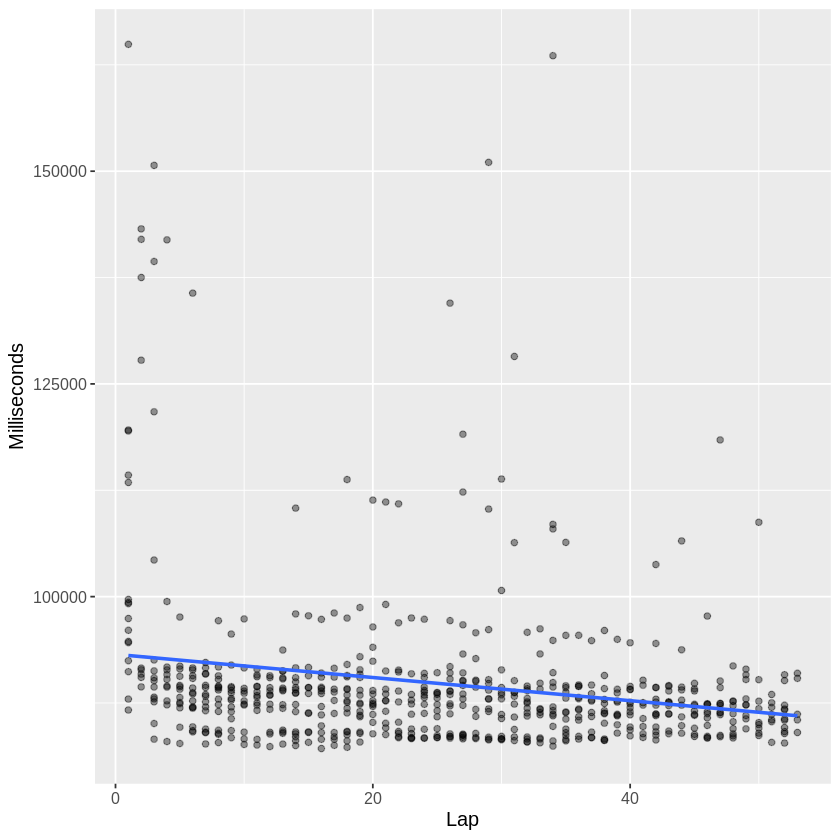

In [20]:
#16. Italy, Monza

fa_monza <- alo_laps %>%
                filter(raceId %in% monza_race_ID) 

fa_monza_clean <- fa_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
fa_monza_clean
fa_monza_clean_ID <- fa_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_monza_races <- alo_laps %>%
                    filter(raceId %in% fa_monza_clean_ID)

formulaone_split <- initial_split(fa_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
7155945,119.2658,1.987763


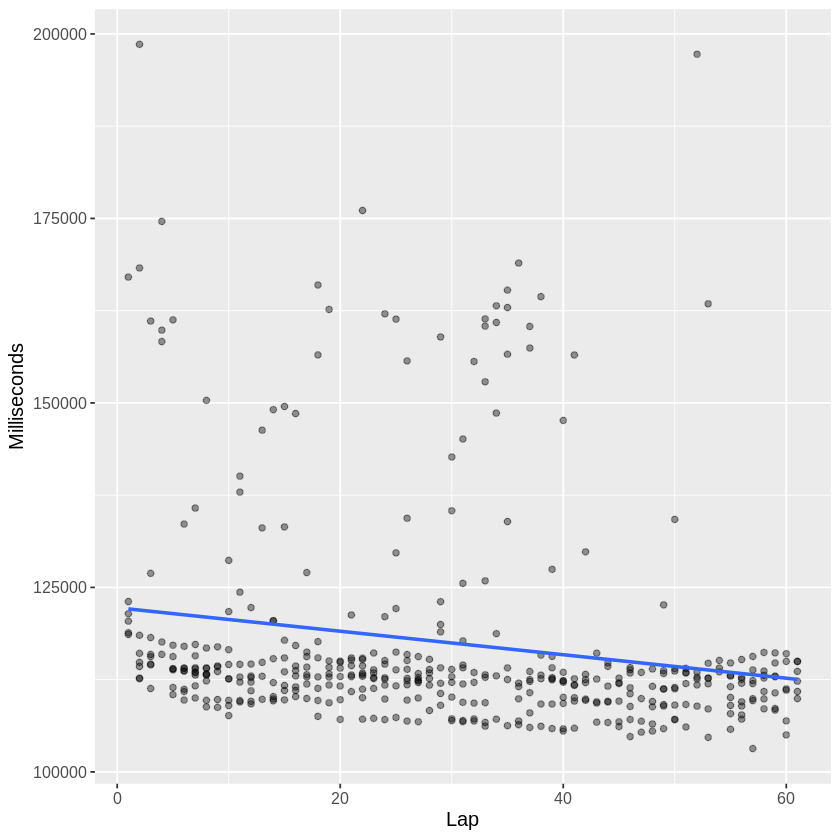

In [21]:
#17. Singapore

fa_singapore <- alo_laps %>%
                filter(raceId %in% singapore_race_ID) 

fa_singapore_clean <- fa_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

fa_singapore_clean_ID <- fa_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_singapore_races <- alo_laps %>%
                    filter(raceId %in% fa_singapore_clean_ID)

formulaone_split <- initial_split(fa_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5327810,88.79684,1.479947


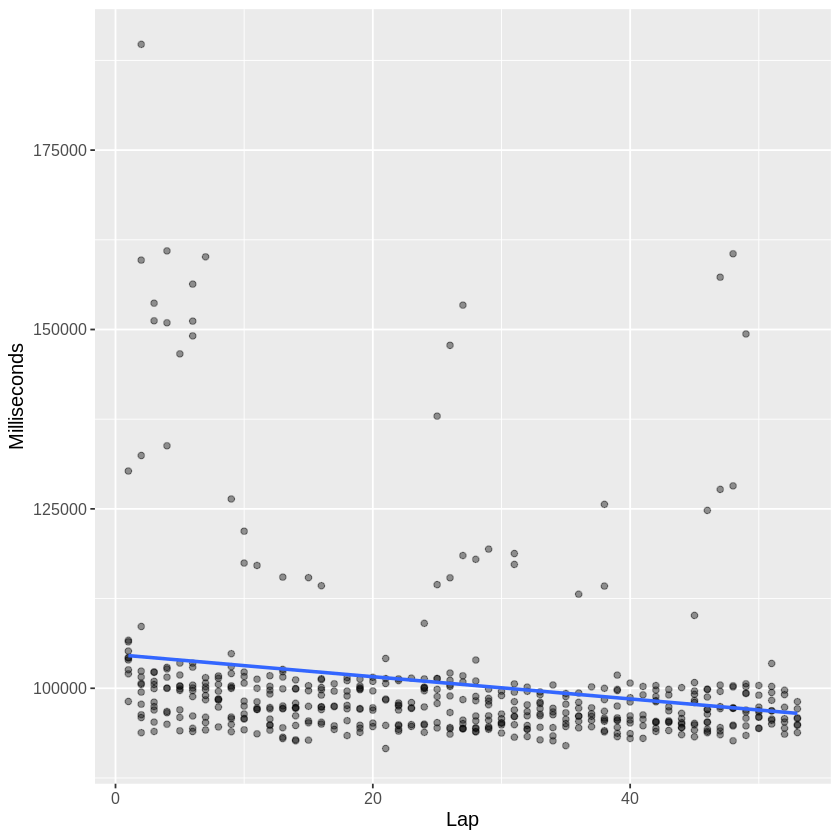

In [22]:
#18. Japan

fa_japan <- alo_laps %>%
                filter(raceId %in% japan_race_ID) 

fa_japan_clean <- fa_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_japan_clean_ID <- fa_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_japan_races <- alo_laps %>%
                    filter(raceId %in% fa_japan_clean_ID)

formulaone_split <- initial_split(fa_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6054362,100.906,1.681767


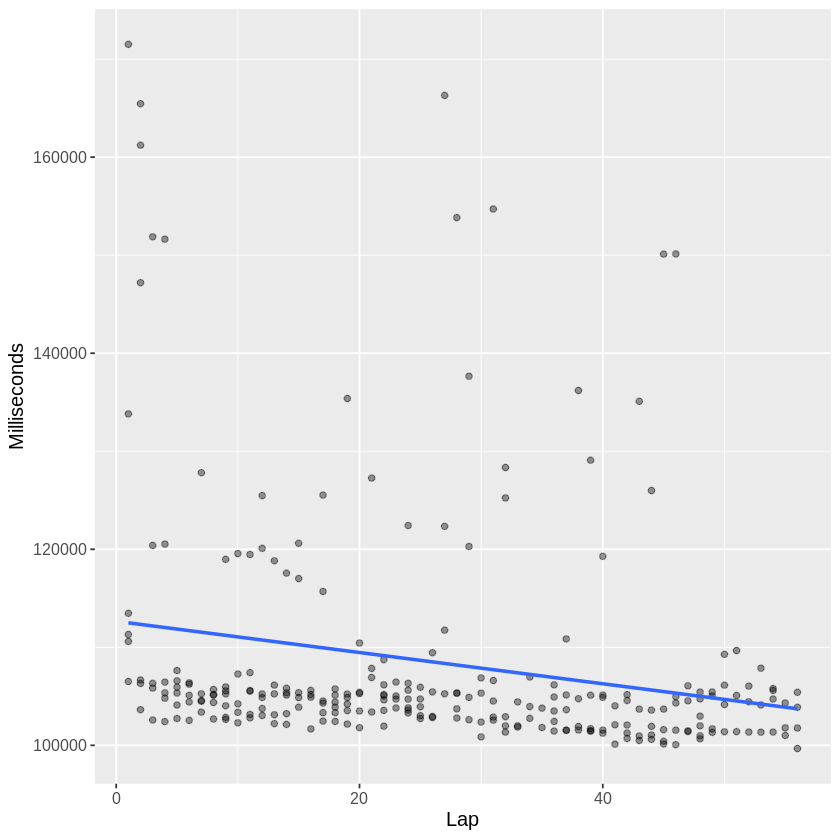

In [23]:
#19.  USA, Austin

fa_austin <- alo_laps %>%
                filter(raceId %in% austin_race_ID) 

fa_austin_clean <- fa_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

fa_austin_clean_ID <- fa_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_austin_races <- alo_laps %>%
                    filter(raceId %in% fa_austin_clean_ID)

formulaone_split <- initial_split(fa_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6045186,100.7531,1.679218


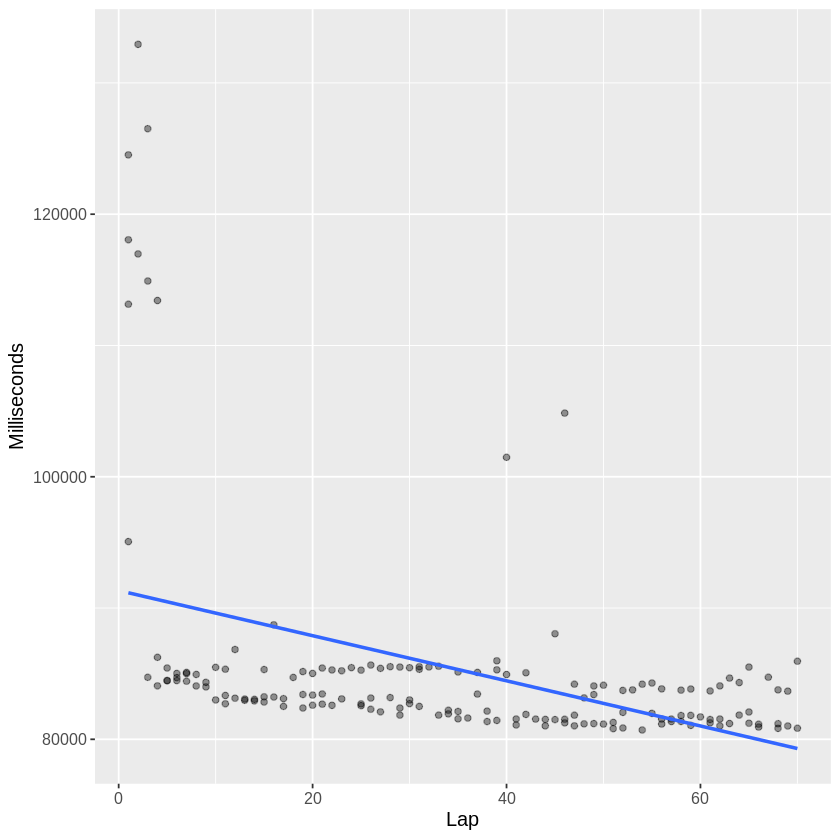

In [24]:
#20. Mexico

fa_mexico <- alo_laps %>%
                filter(raceId %in% mexico_race_ID) 

fa_mexico_clean <- fa_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

fa_mexico_clean_ID <- fa_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_mexico_races <- alo_laps %>%
                    filter(raceId %in% fa_mexico_clean_ID)

formulaone_split <- initial_split(fa_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5816355,96.93926,1.615654


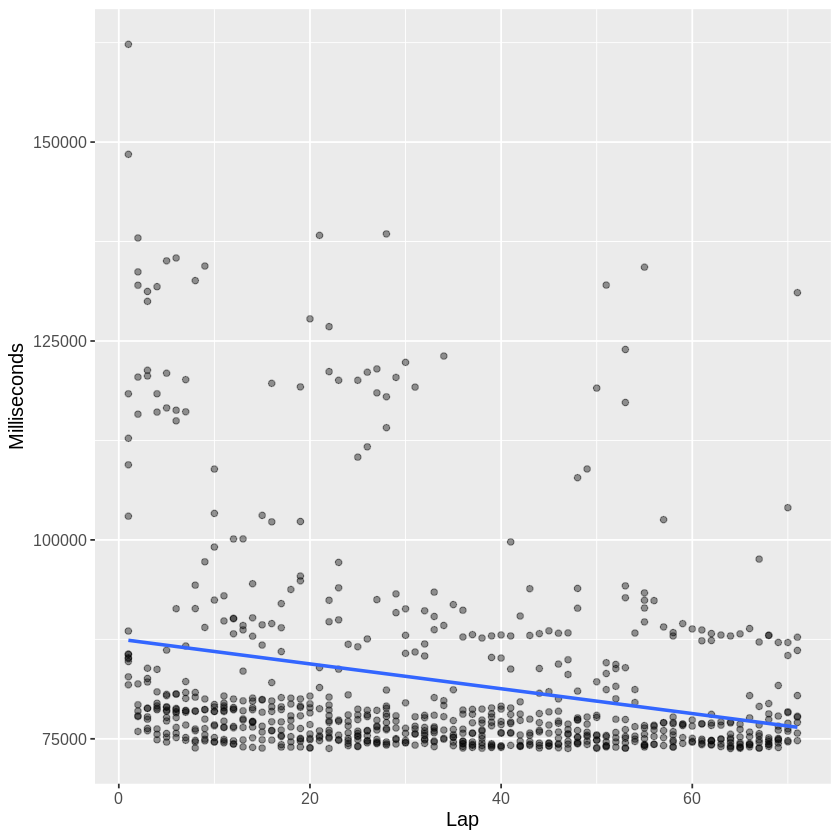

In [25]:
#21. Brazil

fa_brazil <- alo_laps %>%
                filter(raceId %in% brazil_race_ID) 

fa_brazil_clean <- fa_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

fa_brazil_clean_ID <- fa_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_brazil_races <- alo_laps %>%
                    filter(raceId %in% fa_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(fa_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
17,55
355,55
858,55
877,55
897,55
918,55
968,55
988,54
1009,54


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6294115,104.9019,1.748365


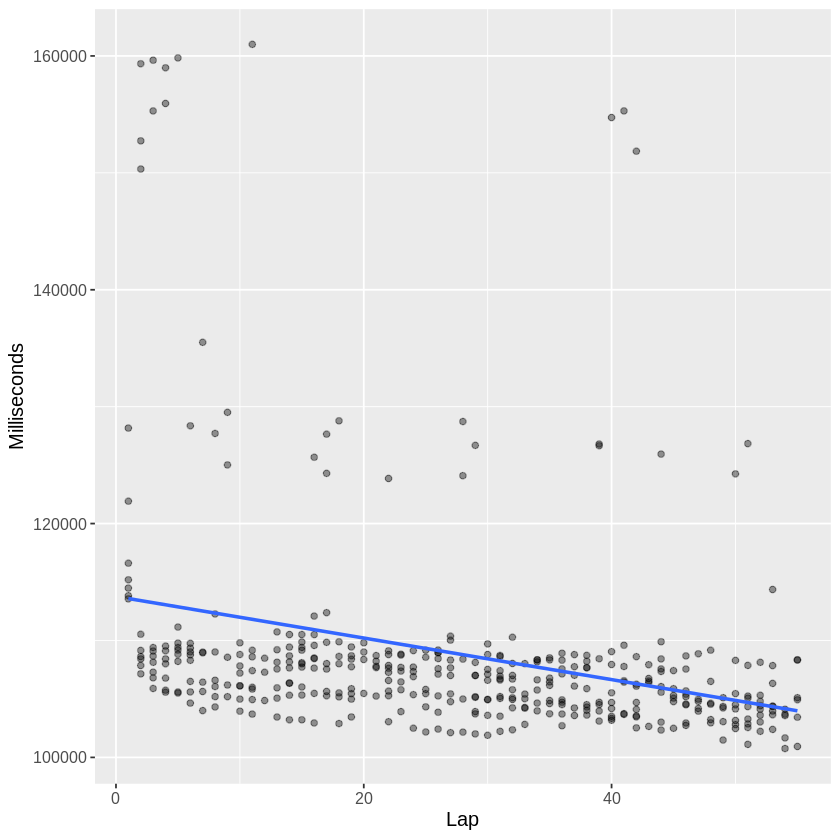

In [26]:
#22. Abu Dhabi

fa_uae <- alo_laps %>%
                filter(raceId %in% uae_race_ID) 

fa_uae_clean <- fa_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_uae_clean
fa_uae_clean_ID <- fa_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_uae_races <- alo_laps %>%
                    filter(raceId %in% fa_uae_clean_ID)

formulaone_split <- initial_split(fa_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col

write_csv(rmse_col, "fa_rmse.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,9160.027,1
rmse,standard,14083.869,2
rmse,standard,15540.885,3
rmse,standard,7709.244,4
rmse,standard,4176.217,5
rmse,standard,10313.211,6
rmse,standard,11096.138,7
rmse,standard,17913.007,8
rmse,standard,12167.942,9
